# Kmeans Clustering

In [2]:
# Install necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the necssary dataset

data = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/entertainment_clean.csv')
data.head()

,name,books,tv_shows,video_games
0,Aaliyah,0.5,4.6,4.9
1,Abigail,0.0,4.5,4.8
2,Addison,0.5,4.5,5.0
3,Adeline,3.5,4.5,6.6
4,Alana,2.8,3.8,5.6


In [ ]:
### Necessary preprocessing and data checks

# 1. Row granularity
# 2. columns not-null
# 3. columns numeric
# 4. feature engineering
# 5. feature selection
# 6. feature scaling


In [4]:
data.shape

(150, 4)

In [6]:
# each row represent a unique student

data.name.nunique()

150

In [7]:
# cheking for null values in the dataframe

data.isnull().sum()

name           0
books          0
tv_shows       0
video_games    0
dtype: int64

In [10]:
# all the columns baring the name column are numeric

data.dtypes

name            object
books          float64
tv_shows       float64
video_games    float64
dtype: object

In [11]:
# drop the name column to make the dataframe ready for modelling

data1 = data.drop('name' , axis=1)
data1.head()

,books,tv_shows,video_games
0,0.5,4.6,4.9
1,0.0,4.5,4.8
2,0.5,4.5,5.0
3,3.5,4.5,6.6
4,2.8,3.8,5.6


In [14]:
# data are on similar scale , we can skip scaling for now

data1.describe()

,books,tv_shows,video_games
count,150.000000,150.000000,150.000000
mean,2.993333,4.586000,5.843333
std,1.917761,0.645587,0.828066
min,0.000000,3.000000,4.300000
25%,0.800000,4.200000,5.100000
50%,3.200000,4.500000,5.800000
75%,4.500000,4.900000,6.400000
max,6.200000,6.600000,7.900000


In [15]:
# Model Building
# Kmeans clustering

from sklearn.cluster import KMeans

In [16]:
# Initialize a kmeans instance

kmeans2 = KMeans(n_clusters=2 , n_init='auto' , random_state=42)
kmeans2

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [17]:
# fit the kmeans model

kmeans2.fit(data1)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

In [30]:
# kmeans model labels

kmeans2.labels_

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

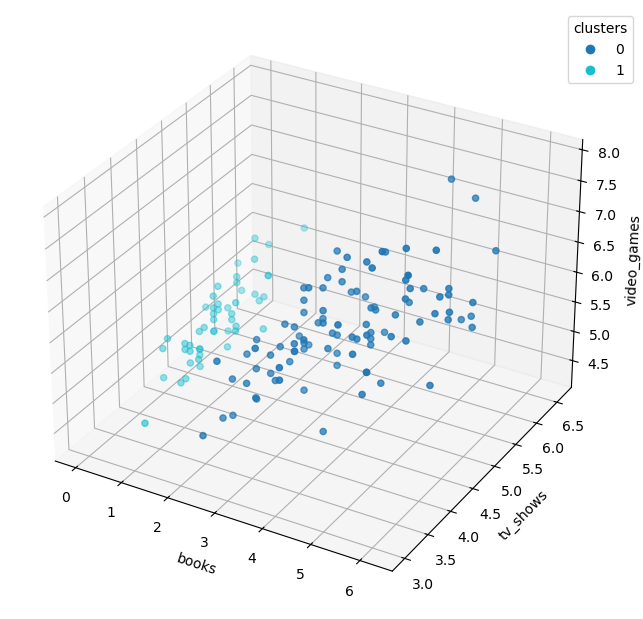

In [39]:
# visualizing kmeans clustering

# importing plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# combining the data and cluster labels
cluster_labels = pd.Series(kmeans2.labels_, name='clusters')


# create a clean dataframe
df_clean = pd.concat([data1 , cluster_labels] , axis=1)

# create a 3D scatterplot
fig = plt.figure(figsize=(8 , 6))
ax = Axes3D(fig)
fig.add_axes(ax)

#specify the data and the labels
sc = ax.scatter(df_clean['books'] , df_clean['tv_shows'] , df_clean['video_games'] , c=df_clean['clusters'] , cmap = 'tab10')
ax.set_xlabel('books')
ax.set_ylabel('tv_shows')
ax.set_zlabel('video_games')

# add a legend
plt.legend(*sc.legend_elements() , title='clusters' , bbox_to_anchor=(1.05 , 1));



In [42]:
# Interpreting the results of Kmeans clustering
# view the cluster centres
kmeans2.cluster_centers_

array([[4.192, 4.314, 6.262],
       [0.596, 5.13 , 5.006]])

In [43]:
# view the cluster centres in a dataframe

cluster_centres3 = pd.DataFrame(kmeans2.cluster_centers_ , columns=data1.columns)
cluster_centres3

,books,tv_shows,video_games
0,4.192,4.314,6.262
1,0.596,5.130,5.006


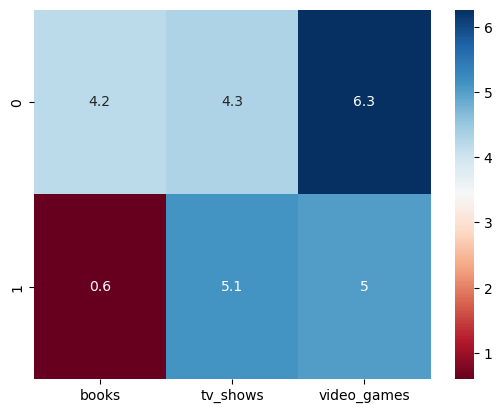

In [45]:
# view the cluster centres in heatmap

sns.heatmap(cluster_centres3 , cmap='RdBu' , annot=True);

In [ ]:
# Cluster definition based on cluster_centres

cluster 1 : non readers ( very low value on book reading )
cluster 0 : entertainment enthusiasts ( balance in consumption of different forms of entertainment )


# Cereal Data Clustering


In [46]:
# Import necessary dataset

df = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [49]:
# drop the name and manufactuer column 

data = df[['Calories', 'Protein (g)', 'Fat', 'Sugars', 'Vitamins and Minerals']]
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [51]:
# create a kmeans model with 2 clusters
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2 , n_init='auto' , random_state=42)
kmeans2.fit(data)

C:\Users\ariji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=42)

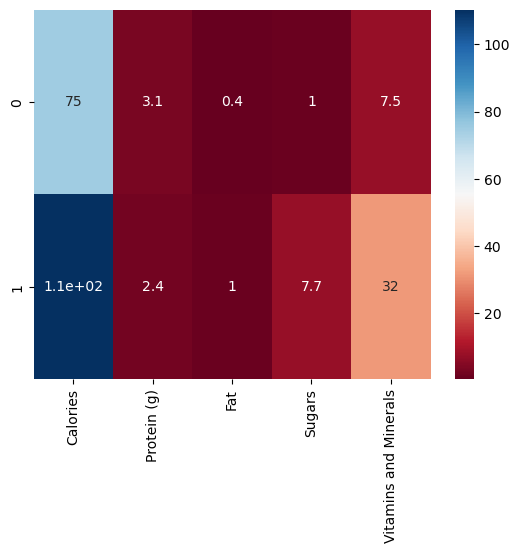

In [57]:
# interpreting the cluster centres

sns.heatmap(pd.DataFrame(kmeans2.cluster_centers_ , columns=data.columns) , cmap='RdBu' , annot=True);

In [ ]:
# cluster 0 : High in Calories
# cluster 1 : High in calories and Vitamins and Minerals

# Inertia Plot

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

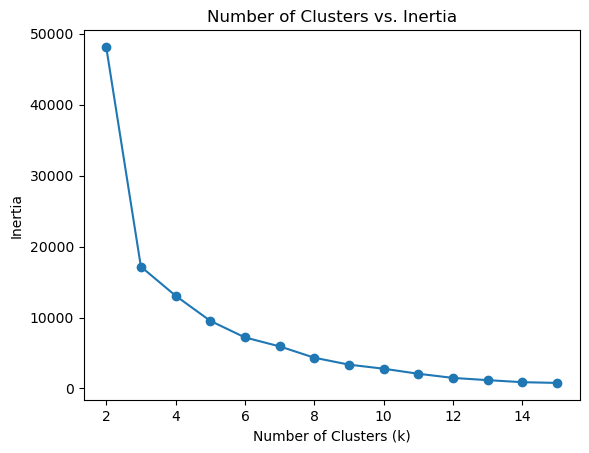

In [78]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [ ]:
# Based on the elbow plot above the biggest drop is at cluster = 3


In [80]:
# build a kmeans model with 3 clusters

kmeans3 = KMeans(n_clusters=3 , n_init='auto' , random_state=42)
kmeans3.fit(data)


KMeans(n_clusters=3, n_init='auto', random_state=42)

<Axes: >

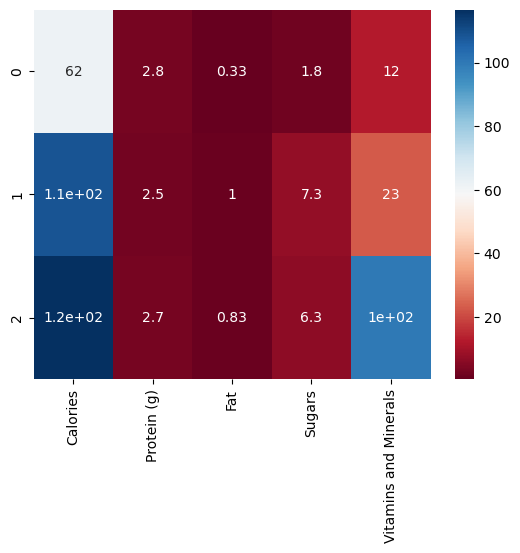

In [84]:
# Visualize and interpret the cluster centres

sns.heatmap(pd.DataFrame(kmeans3.cluster_centers_ , columns=data.columns) , cmap='RdBu' , annot=True)

In [ ]:
Cluster 0 : Low / average calories and vitamins and minerals ( Empty Cereals )
Cluster 1 : High in Calories and low Vitamin and minerals ( Hearty Cereals )
Cluster 2 : High in Calories and high Vitamin and minerals ( Typical Cereals )

In [85]:
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [87]:
# Finetune the kmeans model
# Drop the fat column since it does'nt do a good job distiguishing the cluters ( same can be said about protein column )

# 1. Remove the ”Fat” column
data_subset = data[['Calories', 'Protein (g)', 'Sugars', 'Vitamins and Minerals']]
data_subset.head()


,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25


In [88]:
# 2. Standardize the remaining columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_ft = scaler.fit_transform(data_subset)
data_scaled = pd.DataFrame(scaler_ft, columns=data_subset.columns)
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


In [89]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

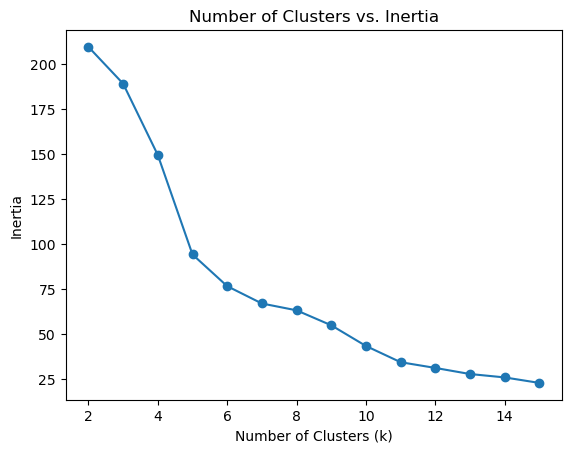

In [91]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series_scaled = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series_scaled.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [ ]:
# elbow of the plot is at 4 , 6

In [92]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans6 = KMeans(n_clusters=6, n_init='auto', random_state=42)
kmeans6.fit(data_scaled)

KMeans(n_clusters=6, n_init='auto', random_state=42)

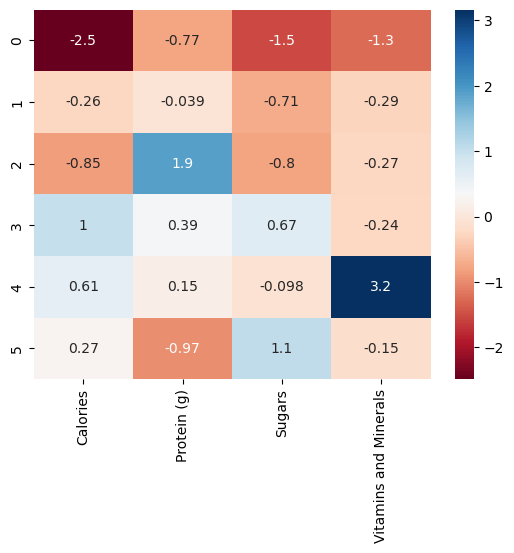

In [100]:
# 3e. Interpret the cluster centers using a heat map
cluster_centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns=data_subset.columns)
sns.heatmap(cluster_centers6, cmap='RdBu', annot=True);

In [ ]:
Cluster 0 : low(calorie + sugar + Vitamins and Minerals ) ---> low_calorie_cereal
cluster 1 : neutral---> typical_cereal
cluster 2 : high protein----> high_protein_cereal
cluster 3 : high calories + sugar ---> unhealthy_cereal
cluster 4 : average calories + high Vitamins and Minerals ---> High_vitaminsandminerals_cereal
cluster 5 : low protein-----> low_protein_cereal


# Select the best Kmeans model

In [101]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model

In [103]:
# model 1: assign the cluster name to each row
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({0: 'Typical Cereals',
                                    1: 'Hearty Cereals',
                                    2: 'Empty Cereals'})
model1_names.head()

0    Typical Cereals
1     Hearty Cereals
2    Typical Cereals
3    Typical Cereals
4     Hearty Cereals
Name: model1_clusters, dtype: object

In [104]:
# model 2: assign the cluster name to each row
model2_clusters = pd.Series(kmeans6.labels_, name='model2_clusters')
model2_names = model2_clusters.map({0: 'low_calorie_cereal',
                                    1: 'typical_cereal',
                                    2: 'high_protein_cereal',
                                    3: 'unhealthy_cereal',
                                    4: 'High_vitaminsandminerals_cereal',
                                    5: 'low_protein_cereal'})
model2_names.head()

0    high_protein_cereal
1       unhealthy_cereal
2    high_protein_cereal
3    high_protein_cereal
4     low_protein_cereal
Name: model2_clusters, dtype: object

In [ ]:
# 2. Look at the number of cereals that fall into each cluster

In [105]:
# view the number of cereals in each cluster
model1_names.value_counts()

model1_clusters
Hearty Cereals     62
Typical Cereals     6
Empty Cereals       6
Name: count, dtype: int64

In [106]:
# view the number of cereals in each cluster
model2_names.value_counts()

model2_clusters
typical_cereal                     24
low_protein_cereal                 20
unhealthy_cereal                   12
high_protein_cereal                 9
High_vitaminsandminerals_cereal     6
low_calorie_cereal                  3
Name: count, dtype: int64

In [107]:
# 3. Decide on the best model for our client
# Model 1 has most cereals in a single cluster vs Model 2 has a better distribution, so let's go with Model 2

In [108]:
# 4. Recommend a specific number of displays

In [109]:
# 5. Suggest a few cereals that should be shown in each display


# Typical cereal to be displayed in Cereal aisle

In [111]:
# combine the cluster names with the original data set
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)
cluster_names.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
0,100%_Bran,Nabisco,70,4,1,6,25,Typical Cereals,high_protein_cereal
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,Hearty Cereals,unhealthy_cereal
2,All-Bran,Kelloggs,70,4,1,5,25,Typical Cereals,high_protein_cereal
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,Typical Cereals,high_protein_cereal
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Hearty Cereals,low_protein_cereal


In [112]:
# view the top manufacturers
cluster_names.Manufacturer.value_counts()

Manufacturer
Kelloggs                       23
General Mills                  22
Quaker Oats                     8
Post                            8
Nabisco                         6
Ralston Purina                  6
American Home Food Products     1
Name: count, dtype: int64

In [114]:
# view the typical cereals
cereal_typical = cluster_names[cluster_names.model2_clusters == 'typical_cereal']
cereal_typical.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
8,Bran_Chex,Ralston Purina,90,2,1,6,25,Hearty Cereals,typical_cereal
9,Bran_Flakes,Post,90,3,0,5,25,Hearty Cereals,typical_cereal
15,Corn_Chex,Ralston Purina,110,2,0,3,25,Hearty Cereals,typical_cereal
16,Corn_Flakes,Kelloggs,100,2,0,2,25,Hearty Cereals,typical_cereal
20,Cream_of_Wheat_(Quick),Nabisco,100,3,0,0,0,Hearty Cereals,typical_cereal


In [115]:
# select one cereal from each major manufacturer -- maybe corn flakes and cheerios
cereal_typical[cereal_typical.Manufacturer.isin(['Kelloggs', 'General Mills'])].head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
16,Corn_Flakes,Kelloggs,100,2,0,2,25,Hearty Cereals,typical_cereal
21,Crispix,Kelloggs,110,2,0,3,25,Hearty Cereals,typical_cereal
26,Frosted_Mini-Wheats,Kelloggs,100,3,0,7,25,Hearty Cereals,typical_cereal
39,Kix,General Mills,110,2,1,3,25,Hearty Cereals,typical_cereal
44,Multi-Grain_Cheerios,General Mills,100,2,1,6,25,Hearty Cereals,typical_cereal


# Sugary cereals to display near the snacks & candy aisle

In [116]:
# view the sugary cereals
cereal_sugary = cluster_names[cluster_names.model2_clusters.isin(['low_protein_cereal',
                                                                  'unhealthy_cereal'])]
cereal_sugary.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0,Hearty Cereals,unhealthy_cereal
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Hearty Cereals,low_protein_cereal
5,Apple_Cinnamon_Cheerios,General Mills,110,2,2,10,25,Hearty Cereals,low_protein_cereal
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Hearty Cereals,low_protein_cereal
7,Basic_4,General Mills,130,3,2,8,25,Hearty Cereals,unhealthy_cereal


In [117]:
# sort by most sugar -- maybe golden crisp and smacks
cereal_sugary.sort_values('Sugars', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
29,Golden_Crisp,Post,100,2,0,15,25,Hearty Cereals,low_protein_cereal
63,Smacks,Kelloggs,110,2,1,15,25,Hearty Cereals,low_protein_cereal
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Hearty Cereals,low_protein_cereal
49,Post_Nat._Raisin_Bran,Post,120,3,1,14,25,Hearty Cereals,unhealthy_cereal
43,Mueslix_Crispy_Blend,Kelloggs,160,3,2,13,25,Hearty Cereals,unhealthy_cereal


# Healthy cereals to display near the healthy foods aisle

In [125]:
# view the healthy cereals
cereal_healthy = cluster_names[cluster_names.model2_clusters.isin(['high_protein_cereal',
                                                                   'High_vitaminsandminerals_cereal',
                                                                   'low_calorie_cereal '])]
cereal_healthy.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
0,100%_Bran,Nabisco,70,4,1,6,25,Typical Cereals,high_protein_cereal
2,All-Bran,Kelloggs,70,4,1,5,25,Typical Cereals,high_protein_cereal
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25,Typical Cereals,high_protein_cereal
11,Cheerios,General Mills,110,6,2,1,25,Hearty Cereals,high_protein_cereal
37,Just_Right_Crunchy__Nuggets,Kelloggs,110,2,1,6,100,Empty Cereals,High_vitaminsandminerals_cereal


In [126]:
# sort by most protein -- maybe cheerios and special k
cereal_healthy.sort_values('Protein (g)', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
11,Cheerios,General Mills,110,6,2,1,25,Hearty Cereals,high_protein_cereal
64,Special_K,Kelloggs,110,6,0,3,25,Hearty Cereals,high_protein_cereal
54,Quaker_Oatmeal,Quaker Oats,100,5,2,-1,0,Hearty Cereals,high_protein_cereal
0,100%_Bran,Nabisco,70,4,1,6,25,Typical Cereals,high_protein_cereal
2,All-Bran,Kelloggs,70,4,1,5,25,Typical Cereals,high_protein_cereal
